__В этой части мы подготовим данные к визуализации, чтобы графики(и их оси) не выглядели громоздко__

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('hh_EDA.csv')
df

,link,vacancy,wage,company,city,experience,company_rating,working_hours,employee_location
0,https://adsrv.hh.ru/click?b=1003372&place=35&m...,Водитель со своим грузовым автомобилем,180000,ИП Петрикин Александр Вячеславович,Москва,Без опыта,4.5,Полная занятость,В офисе
1,https://adsrv.hh.ru/click?b=993174&place=36&me...,Консультант поддержки в Яндекс Путешествия,30000,Яндекс Крауд: Поддержка,Москва,Без опыта,4.0,Полная занятость,Удалённая работа
2,https://hh.ru/vacancy/98672015?hhtmFrom=vacanc...,Менеджер по заполнению анкет (удаленно),36800,ИП Кабин Дмитрий Владимирович,Москва,Без опыта,3.5,Полная занятость,Удалённая работа
3,https://hh.ru/vacancy/98657055?hhtmFrom=vacanc...,Ручной тестировщик (QA Manual Junior),60000,Oxytocin,Москва,Без опыта,3.5,Полная занятость,В офисе
4,https://hh.ru/vacancy/93848299?utm_source=head...,Торговый представитель (Водитель-курьер),170000,ЦУМ,Москва,Опыт от 1 года до 3 лет,4.0,Полная занятость,Сменный график
...,...,...,...,...,...,...,...,...,...
2072,https://hh.ru/vacancy/98610683?hhtmFrom=vacanc...,Кладовщик,70000,ООО ЦУГАМ,Москва,Опыт от 1 года до 3 лет,2.0,Частичная занятость,В офисе
2073,https://hh.ru/vacancy/98627094?hhtmFrom=vacanc...,"Специалист по клиническим исследованиям, CRA, ...",70000,ООО ЦУГАМ,Москва,Опыт от 1 года до 3 лет,2.0,Частичная занятость,В офисе
2074,https://hh.ru/vacancy/98631350?hhtmFrom=vacanc...,Официант в Кремль,70000,ФГБУ Комбинат питания Кремлевский,Москва,Опыт от 3 до 6 лет,2.0,Частичная занятость,В офисе
2075,https://hh.ru/vacancy/98673570?hhtmFrom=vacanc...,"Водитель с грузовым автомобилем, смена от 9000...",160000,Центр Доставки,Москва,Без опыта,2.0,Частичная занятость,В офисе


__Описание переменных:__
* `link` - ссылка на вакансию
* `vacancy` - должность
* `wage` - заявленная в объявлении зарплата(целевая переменная)
* `company` - работодатель
* `city` - город
* `experience` - требуемый опыт работы 
* `company_rating` - рейтинг работодателя на сайте hh.ru
* `working_hours` - занятость
* `employee_location` - место работы, график работы

In [53]:
min(df.wage), max(df.wage)

(1000, 2000000)

В столбце с зарплатами большие числа и большой разброс, хочется как-то подправить. Для удобства разделим на 1000.

In [54]:
df['wage_k'] = df['wage'].map(lambda x: x / 1000)
df.head()

,link,vacancy,wage,company,city,experience,company_rating,working_hours,employee_location,wage_k
0,https://adsrv.hh.ru/click?b=1003372&place=35&m...,Водитель со своим грузовым автомобилем,180000,ИП Петрикин Александр Вячеславович,Москва,Без опыта,4.5,Полная занятость,В офисе,180.0
1,https://adsrv.hh.ru/click?b=993174&place=36&me...,Консультант поддержки в Яндекс Путешествия,30000,Яндекс Крауд: Поддержка,Москва,Без опыта,4.0,Полная занятость,Удалённая работа,30.0
2,https://hh.ru/vacancy/98672015?hhtmFrom=vacanc...,Менеджер по заполнению анкет (удаленно),36800,ИП Кабин Дмитрий Владимирович,Москва,Без опыта,3.5,Полная занятость,Удалённая работа,36.8
3,https://hh.ru/vacancy/98657055?hhtmFrom=vacanc...,Ручной тестировщик (QA Manual Junior),60000,Oxytocin,Москва,Без опыта,3.5,Полная занятость,В офисе,60.0
4,https://hh.ru/vacancy/93848299?utm_source=head...,Торговый представитель (Водитель-курьер),170000,ЦУМ,Москва,Опыт от 1 года до 3 лет,4.0,Полная занятость,Сменный график,170.0


In [55]:
del df['wage']

Для начала построим вайолинплот, чтобы посмотреть на взаимосвязь основных, на наш взгляд, признаков с целевой переменной(зарплатой)

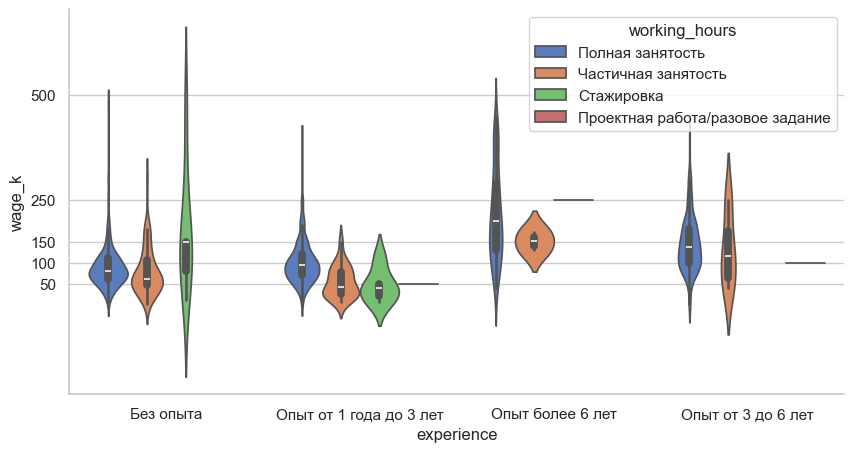

In [56]:
sns.set_theme(style='whitegrid', palette='muted')
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
experience_wage = sns.violinplot(data=df.loc[df['wage_k'] < 500], y='wage_k', x='experience', hue='working_hours')
# ax.set(ylabel="")
ax.set_yticks([50, 100, 150, 250, 500])

__Наблюдения:__
1. Даже кандидатам без опыта предлагают хорошие зарплаты. В жизни бы так.
2. Но все-таки самые высокие зарплаты предлагают кандидатам с опытом от 6 лет.
3. Очень-очень опытных людей ищут реже, чем работников с меньшим опытом.
4. В целом мы видим какой-то огромный разброс зарплат, хочется изучить поглубже.

Теперь составим списки из категориальных и действительных переменных.

In [57]:
var_cat = ['city', 'experience', 'working_hours', 'employee_location']
var_real = 'company_rating'
target = 'wage_k'

А еще приведем их в порядок.

__1. city__

In [58]:
df['city'].unique()

array(['Москва', 'Москва, Кантемировская и еще\xa01\xa0',
       'Москва, Китай-город и еще\xa03\xa0',
       'Москва, Краснопресненская и еще\xa01\xa0', 'Москва, Фрунзенская',
       'Москва, ВДНХ', 'Москва, Трубная',
       'Москва, Смоленская и еще\xa01\xa0',
       'Москва, Бульвар Рокоссовского',
       'Москва, Бауманская и еще\xa01\xa0',
       'Москва, Выставочная и еще\xa02\xa0',
       'Москва, Выхино и еще\xa03\xa0',
       'Москва, Парк культуры и еще\xa01\xa0', 'Москва, Автозаводская',
       'Москва, Курская и еще\xa03\xa0', 'Москва, Беляево и еще\xa02\xa0',
       'Москва, Планерная и еще\xa02\xa0', 'Москва, Бутырская ',
       'Москва, Киевская и еще\xa02\xa0', 'Москва, Белорусская',
       'Москва, Мякинино и еще\xa02\xa0', 'Москва, Деловой центр',
       'Москва, Речной вокзал', 'Москва, Дмитровская и еще\xa01\xa0',
       'Москва, Румянцево и еще\xa02\xa0', 'Москва, Профсоюзная',
       'Москва, Беляево', 'Москва, Зорге и еще\xa03\xa0',
       'Москва, Пражская и еще

Нам пофиг на метро, так что поменяем

In [59]:
df['city'].map(lambda x: x.split(',')[0])

0       Москва
1       Москва
2       Москва
3       Москва
4       Москва
         ...  
2072    Москва
2073    Москва
2074    Москва
2075    Москва
2076    Москва
Name: city, Length: 2077, dtype: object

In [60]:
df['city'].map(lambda x: x.split(',')[0]).unique()

array(['Москва', 'Воронеж', 'Иваново (Ивановская область)', 'Серпухов',
       'Одинцово', 'Ростов-на-Дону', 'Зеленоград', 'Тучково', 'Химки',
       'Екатеринбург', 'Казань', 'Обнинск', 'Санкт-Петербург', 'Минск',
       'Тверь'], dtype=object)

In [61]:
df['city'].map(lambda x: x.split(',')[0]).value_counts()

city
Москва                          2051
Воронеж                            5
Ростов-на-Дону                     3
Одинцово                           2
Зеленоград                         2
Казань                             2
Обнинск                            2
Санкт-Петербург                    2
Минск                              2
Иваново (Ивановская область)       1
Серпухов                           1
Тучково                            1
Химки                              1
Екатеринбург                       1
Тверь                              1
Name: count, dtype: int64

Учитывая такое ничтожное количество других городов помимо Москвы, видится целесообразным преобразование этого признака в бинарный: Москва/не Москва

In [62]:
df['city'] = df['city'].map(lambda x: x.split(',')[0]).map(lambda x: 'Другое' if x != 'Москва' else x)
df['city'].value_counts()

city
Москва    2051
Другое      26
Name: count, dtype: int64

__2. experience__

In [63]:
df['experience'].value_counts()

experience
Без опыта                  954
Опыт от 1 года до 3 лет    724
Опыт от 3 до 6 лет         308
Опыт более 6 лет            91
Name: count, dtype: int64

_Введем обозначения:_
`0` - без опыта
`1` - 1-3 года
`3` - 3-6 лет
`6` - от 6 лет

In [64]:
df['experience'] = df['experience'].map(lambda x: 1 if ('1' in x and '3' in x) 
                     else 3 if ('3' in x and '6' in x) 
                     else 6 if ('6' in x)
                     else 0)
df['experience'].value_counts()

experience
0    954
1    724
3    308
6     91
Name: count, dtype: int64

__3. working_hours__

In [65]:
df['working_hours'].value_counts()

working_hours
Полная занятость                    1964
Частичная занятость                   96
Стажировка                            15
Проектная работа/разовое задание       2
Name: count, dtype: int64

Так как значение "полная занятость" явно превалирует над остальными, этот показатель в целом не будет особо репрезентативным. Но все же, чтобы сместить веса, я предлагаю заменить включить "стажировку" и "проектную работу" в "частичную занятость"


In [66]:
df['working_hours'] = df['working_hours'].map(lambda x: 'Частичная занятость' if x != 'Полная занятость' else x)
df['working_hours'].value_counts()

working_hours
Полная занятость       1964
Частичная занятость     113
Name: count, dtype: int64

__4. employee location__

In [67]:
df['employee_location'].value_counts()

employee_location
В офисе             1520
Сменный график       292
Удалённая работа     142
Гибкий график         95
Вахтовый метод        28
Name: count, dtype: int64

Это наш самый ненавистный столбик, потому что здесь каша. Пока что пусть остается таким.

__Подготовка к визуализации завершена. Сохраним таблицу в новом виде и приступим к построению графиков.__

In [68]:
df.to_csv('hh_EDA_upd.csv', index=False)